# NBA Data Project

*Cristian Leon*

## Preliminaries

The dataset and its description are both in the `data` folder. For this project you'll need `numpy`, `pandas`, and either `matplotlib` or `seaborn` for visualization. 

In the next cell, make your imports and load the dataset:

In [140]:
# Imports and loading the dataset
import numpy as py
import pandas as pd 
import matplotlib as plt
import seaborn as sns
nba = pd.read_csv("nba_data.csv")

## Exploration

Use `.head()` and `.info()` to ensure that the data was loaded correctly and to get a feel for the data types in each column. Use `.describe()` to check whether or not there are any extreme values that don't make sense (*e.g. Can someone play negative minutes or score negative points? Can someone play a million minutes when there are only 48 minutes per game and 82 games in a season?*)

In [141]:
# Exploring the dataset
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,100,228,328,50,31,30,59,102,508,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,214,271,485,97,36,46,79,98,361,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,184,504,688,240,88,61,187,208,1529,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,43,78,121,67,16,15,41,99,467,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,85,286,371,97,45,48,60,143,696,aldamsa01


In [142]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 679 non-null    int64  
 1   Player             679 non-null    object 
 2   Pos                679 non-null    object 
 3   Age                679 non-null    int64  
 4   Tm                 679 non-null    object 
 5   G                  679 non-null    int64  
 6   GS                 679 non-null    int64  
 7   MP                 679 non-null    int64  
 8   FG                 679 non-null    int64  
 9   FGA                679 non-null    int64  
 10  FG%                676 non-null    float64
 11  3P                 679 non-null    int64  
 12  3PA                679 non-null    int64  
 13  3P%                655 non-null    float64
 14  2P                 679 non-null    int64  
 15  2PA                679 non-null    int64  
 16  2P%                672 non

In [143]:
nba.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,676.000000,679.000000,679.000000,...,642.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,265.976436,26.025037,43.338733,20.069219,984.421208,169.387334,357.377025,0.464241,50.795287,140.606775,...,0.752586,42.156112,133.879234,176.035346,102.970545,29.698085,18.718704,54.263623,81.194404,463.219440
std,154.956296,4.325709,24.727306,25.766359,800.236331,169.157722,350.737612,0.112790,57.218086,151.702365,...,0.150094,49.187520,130.378234,172.793776,122.358385,27.079014,24.584790,55.433154,64.056510,471.423224
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.500000,23.000000,22.000000,0.000000,266.500000,36.000000,79.000000,0.415000,4.500000,16.500000,...,0.686500,9.000000,32.000000,45.000000,18.000000,7.000000,4.000000,12.000000,26.000000,95.500000
50%,264.000000,25.000000,45.000000,6.000000,797.000000,108.000000,237.000000,0.454000,30.000000,89.000000,...,0.769000,27.000000,94.000000,126.000000,57.000000,22.000000,11.000000,36.000000,68.000000,291.000000
75%,399.500000,29.000000,65.500000,36.500000,1663.500000,253.500000,529.000000,0.506000,77.000000,218.000000,...,0.844750,57.000000,196.500000,260.500000,137.500000,45.000000,24.500000,81.000000,123.000000,689.000000
max,539.000000,42.000000,83.000000,83.000000,2963.000000,728.000000,1559.000000,1.000000,301.000000,731.000000,...,1.000000,274.000000,744.000000,973.000000,741.000000,128.000000,193.000000,300.000000,279.000000,2225.000000


## Data Cleaning

- The `Rk` and `Player-additional` columns won't be useful to us. Delete them.
- There are several columns with null entries; deal with them appropriately:
    - Is it reasonable for null entries to exist in these columns?
    - Do we need to replace the null values with some other value?

In [144]:
# Cleaning the dataset
nba = nba.drop(["Rk", "Player-additional"], axis=1)
# why? because player-additional and rank cannot provide any statistical data.

#It is reasonable for there to be null entries 
#in percentage columns because when calculating
#percentages if the player doesn't make any 2P or 3P shots
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  679 non-null    object 
 1   Pos     679 non-null    object 
 2   Age     679 non-null    int64  
 3   Tm      679 non-null    object 
 4   G       679 non-null    int64  
 5   GS      679 non-null    int64  
 6   MP      679 non-null    int64  
 7   FG      679 non-null    int64  
 8   FGA     679 non-null    int64  
 9   FG%     676 non-null    float64
 10  3P      679 non-null    int64  
 11  3PA     679 non-null    int64  
 12  3P%     655 non-null    float64
 13  2P      679 non-null    int64  
 14  2PA     679 non-null    int64  
 15  2P%     672 non-null    float64
 16  eFG%    676 non-null    float64
 17  FT      679 non-null    int64  
 18  FTA     679 non-null    int64  
 19  FT%     642 non-null    float64
 20  ORB     679 non-null    int64  
 21  DRB     679 non-null    int64  
 22  TR

## Data Augmentation

While the stats included in the dataset are useful for giving us a wide view of a player's contributions throughout the season, basketball fans and analysts have devised more advanced tools to more accurately quantify these contributions. You can look up any of these statistics to see how they're calculated

Add the following statistics as new columns to the dataframe (suggested column name in parentheses):
- Points per shot (PPS)
- Points per possession (PPP)
- True Shooting Percentage (TS%)
- Free Throw Rate (FTR)
- Assist-to-Turnover Ratio (ATO)
- Hollinger Assist Ratio (hAST%)

In [145]:
# Adding Additional Analytics

nba["PPS"] = (nba["2P"]*2+nba["3P"]*3)/(nba["FGA"])
nba["PPP"] = nba["PTS"]/(nba["FGA"]+0.44*nba["FTA"]+nba["TOV"])
nba["TS%"] = (nba["PTS"]/2)/(nba["FGA"]+0.475*nba["FTA"])
nba["FTR"] = nba["FTA"]/nba["FGA"]
nba["ATO"] = nba["AST"]/nba["TOV"]
nba["hAST%"] = nba["AST"]/(nba["FGA"]+0.475*nba["FTA"]+nba["AST"]+nba["TOV"])
nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,30,59,102,508,1.042079,0.981529,0.548715,0.306931,0.847458,0.087428
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,46,79,98,361,1.193916,0.905306,0.556626,0.490494,1.227848,0.193893
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,61,187,208,1529,1.081688,1.034590,0.585846,0.360862,1.283422,0.138572
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,15,41,99,467,1.064767,1.021077,0.557579,0.178756,1.634146,0.127189
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,48,60,143,696,1.120000,1.073478,0.586451,0.274286,1.616667,0.129264


### Team-Contextual Analytics
Understanding a player's value in the context of their *team* is also an important consideration. For example, could a given player be scoring more points simply because they're playing next to a superstar who commands more defensive attention? Is a given center grabbing lots of defensive rebounds because they're skilled, or because their teammates are forcing more bad shots? The following statistics are a bit more difficult to calculate, but may yield better insight about a player's *context* within his team:

- `Rebound Rate (TRB%)`  DO NOT DO
- Usage Percentage (USG%)

For these stats you'll need to calculate *team* totals. I recommend creating a pivot table called `team_totals` that aggregates the sum of each column in your original dataset on a per team basis. Then when you need to use a player's team totals, you can look at the appropriate row/column of the `team_totals` dataframe. 

In [154]:
# Team-Contextual Analytics
stat_columns = list(nba.columns)
for i in ["Player", "Pos", "Age"]:
    stat_columns.remove(i)

team_totals = pd.pivot_table(nba[stat_columns],index="Tm",aggfunc="sum" )

team_possesions = list((team_totals.loc[nba["Tm"],"FGA"]+0.44*team_totals.loc[nba["Tm"],"FTA"]+team_totals.loc[nba["Tm"],"TOV"]))
nba["USG%"] = (100*nba["FGA"]+(1/3)*nba["AST"]+(0.44)*nba["FTA"])/team_possesions
nba.sort_values("USG%",ascending=False)



,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,USG%
590,Jayson Tatum,PF,24,BOS,74,74,2732,727,1559,0.466,...,213,160,2225,1.086594,1.087658,0.599908,0.398974,1.605634,0.141941,17.175678
179,Anthony Edwards,SG,21,MIN,79,79,2842,707,1541,0.459,...,259,186,1946,1.055808,0.980017,0.558730,0.273848,1.351351,0.148908,16.722010
160,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,0.496,...,236,166,2138,1.120083,1.074178,0.601018,0.478951,2.241525,0.207969,16.575119
427,Donovan Mitchell,SG,26,CLE,68,68,2432,679,1402,0.484,...,180,168,1922,1.143367,1.102115,0.609462,0.262482,1.672222,0.146273,15.933808
360,Zach LaVine,SG,27,CHI,77,77,2768,673,1388,0.485,...,194,159,1913,1.116715,1.080596,0.601081,0.308357,1.685567,0.154808,15.550774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Stanley Umude,SG,23,DET,1,0,2,0,1,0.000,...,0,0,2,0.000000,1.063830,0.512821,2.000000,NaN,0.000000,0.010899
362,A.J. Lawson,SG,22,MIN,1,0,2,1,1,1.000,...,0,1,2,2.000000,2.000000,1.000000,0.000000,NaN,0.000000,0.010830
89,Moses Brown,C,23,BRK,2,0,6,0,0,NaN,...,1,1,0,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
196,Michael Foster Jr.,PF,20,PHI,1,0,1,0,0,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


## Querying the Data

### Simple Lookups
Display the top five players in the league for the following stats: minutes, points, free-throw attempts, 3-pointers made, and assists (For each of these statistics, number 1 should be the *biggest*). 

Do these lists make sense? (If you're not sure, check with a friend who's into basketball, they'll help!)

In [ ]:
nba.sort_values("MP", ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,TMP,USG%
77,Mikal Bridges,SF,26,TOT,83,83,2963,593,1267,0.468,...,159,1671,1.069455,1.078538,0.582362,0.278611,2.149606,0.148800,NaN,NaN
179,Anthony Edwards,SG,21,MIN,79,79,2842,707,1541,0.459,...,186,1946,1.055808,0.980017,0.558730,0.273848,1.351351,0.148908,NaN,NaN
360,Zach LaVine,SG,27,CHI,77,77,2768,673,1388,0.485,...,159,1913,1.116715,1.080596,0.601081,0.308357,1.685567,0.154808,NaN,NaN
622,Nikola Vučević,C,32,CHI,82,82,2746,597,1148,0.520,...,179,1447,1.145470,1.066700,0.591554,0.137631,1.906475,0.162871,NaN,NaN
514,Julius Randle,PF,28,NYK,77,77,2737,658,1432,0.459,...,233,1936,1.071229,1.028890,0.574745,0.370810,1.462963,0.142585,NaN,NaN


In [ ]:
nba.sort_values("PTS", ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,TMP,USG%
590,Jayson Tatum,PF,24,BOS,74,74,2732,727,1559,0.466,...,160,2225,1.086594,1.087658,0.599908,0.398974,1.605634,0.141941,NaN,NaN
184,Joel Embiid,C,28,PHI,66,66,2284,728,1328,0.548,...,205,2183,1.146084,1.153050,0.644247,0.580572,1.212389,0.124873,NaN,NaN
160,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,0.496,...,166,2138,1.120083,1.074178,0.601018,0.478951,2.241525,0.207969,NaN,NaN
209,Shai Gilgeous-Alexander,PG,24,OKC,68,68,2416,704,1381,0.510,...,192,2135,1.061550,1.124773,0.616331,0.535119,1.932292,0.161654,NaN,NaN
12,Giannis Antetokounmpo,PF,28,MIL,63,63,2024,707,1278,0.553,...,197,1959,1.143192,1.051146,0.595549,0.604069,1.459350,0.159577,NaN,NaN


In [ ]:
nba.sort_values("FTA", ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,TMP,USG%
12,Giannis Antetokounmpo,PF,28,MIL,63,63,2024,707,1278,0.553,...,197,1959,1.143192,1.051146,0.595549,0.604069,1.459350,0.159577,NaN,NaN
184,Joel Embiid,C,28,PHI,66,66,2284,728,1328,0.548,...,205,2183,1.146084,1.153050,0.644247,0.580572,1.212389,0.124873,NaN,NaN
209,Shai Gilgeous-Alexander,PG,24,OKC,68,68,2416,704,1381,0.510,...,192,2135,1.061550,1.124773,0.616331,0.535119,1.932292,0.161654,NaN,NaN
160,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,0.496,...,166,2138,1.120083,1.074178,0.601018,0.478951,2.241525,0.207969,NaN,NaN
675,Trae Young,PG,24,ATL,73,73,2541,597,1390,0.429,...,104,1914,0.969784,0.971002,0.565094,0.459712,2.470000,0.270979,NaN,NaN


In [ ]:
nba.sort_values("3P", ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,TMP,USG%
598,Klay Thompson,SG,32,GSW,69,69,2279,546,1252,0.436,...,130,1509,1.112620,1.052977,0.573895,0.105431,1.325203,0.101830,NaN,NaN
266,Buddy Hield,SF,30,IND,80,73,2482,475,1038,0.458,...,156,1344,1.192678,1.089353,0.611312,0.124277,1.618705,0.153765,NaN,NaN
139,Stephen Curry,PG,34,GSW,56,56,1941,559,1133,0.493,...,117,1648,1.227714,1.147920,0.650625,0.248014,1.966480,0.195830,NaN,NaN
427,Donovan Mitchell,SG,26,CLE,68,68,2432,679,1402,0.484,...,168,1922,1.143367,1.102115,0.609462,0.262482,1.672222,0.146273,NaN,NaN
373,Damian Lillard,PG,32,POR,58,58,2107,556,1202,0.463,...,109,1866,1.128120,1.138833,0.635970,0.464226,2.225131,0.204028,NaN,NaN


In [ ]:
nba.head().sort_values("AST", ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,TMP,USG%
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,208,1529,1.081688,1.034590,0.585846,0.360862,1.283422,0.138572,NaN,NaN
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,98,361,1.193916,0.905306,0.556626,0.490494,1.227848,0.193893,NaN,NaN
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,143,696,1.120000,1.073478,0.586451,0.274286,1.616667,0.129264,NaN,NaN
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,99,467,1.064767,1.021077,0.557579,0.178756,1.634146,0.127189,NaN,NaN
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,102,508,1.042079,0.981529,0.548715,0.306931,0.847458,0.087428,NaN,NaN


### More Complex Lookups

- Print out the positions in order of highest average points per player to lowest points per player.
- Repeat the previous question for average blocks per player, per position.
- Determine the league's top scorers in terms of *points per minute* among players who average 24 or more minutes per game

In [ ]:
nba.groupby(by="Pos")[["PTS"]].mean().sort_values("PTS", ascending=False)

,PTS
Pos,
SF-SG,743.000000
PF-SF,698.333333
PG,505.770370
SG-PG,496.000000
PF,469.487179
SG,458.238095
SF,447.176000
C,427.147287


In [ ]:
nba.groupby(by="Pos")[["BLK"]].mean().sort_values("BLK", ascending=False)

,BLK
Pos,
C,37.852713
PF-SF,30.333333
PF,22.350427
SF-SG,21.000000
SF,13.456000
PG,11.740741
SG,10.869048
SG-PG,7.000000


In [ ]:
average_minutes = nba["MP"]/nba["G"] >= 24
nba["PPM"] = nba["PTS"]/nba["MP"]
#Points per minute
nba[average_minutes].sort_values("PPM",ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,TMP,USG%,PPM
12,Giannis Antetokounmpo,PF,28,MIL,63,63,2024,707,1278,0.553,...,1959,1.143192,1.051146,0.595549,0.604069,1.459350,0.159577,NaN,NaN,0.967885
184,Joel Embiid,C,28,PHI,66,66,2284,728,1328,0.548,...,2183,1.146084,1.153050,0.644247,0.580572,1.212389,0.124873,NaN,NaN,0.955779
160,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,0.496,...,2138,1.120083,1.074178,0.601018,0.478951,2.241525,0.207969,NaN,NaN,0.894187
373,Damian Lillard,PG,32,POR,58,58,2107,556,1202,0.463,...,1866,1.128120,1.138833,0.635970,0.464226,2.225131,0.204028,NaN,NaN,0.885619
209,Shai Gilgeous-Alexander,PG,24,OKC,68,68,2416,704,1381,0.510,...,2135,1.061550,1.124773,0.616331,0.535119,1.932292,0.161654,NaN,NaN,0.883692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Maxi Kleber,C,31,DAL,37,5,930,77,169,0.456,...,220,1.142012,1.034223,0.588078,0.224852,1.925926,0.195452,NaN,NaN,0.236559
50,Patrick Beverley,PG,34,TOT,67,67,1816,144,360,0.400,...,415,1.022222,0.925100,0.530860,0.180556,3.233333,0.300833,NaN,NaN,0.228524
52,Patrick Beverley,PG,34,CHI,22,22,605,47,119,0.395,...,127,1.000000,0.884401,0.503469,0.126050,4.222222,0.345258,NaN,NaN,0.209917
611,P.J. Tucker,PF,37,PHI,75,75,1920,96,225,0.427,...,266,1.097778,0.952995,0.563738,0.102222,1.363636,0.176510,NaN,NaN,0.138542


## Visualizing the Data

- Create a heatmap that shows the number of players in each *quintile* of points scored at each position (this should be a 5x5 heatmap)
- Create a scatter plot that shows players' total points on the y axis vs minutes on the x axis. Draw a trendline fit to the data. What does that trendline represent?

<Axes: xlabel='Pos', ylabel='PTS Quintile'>

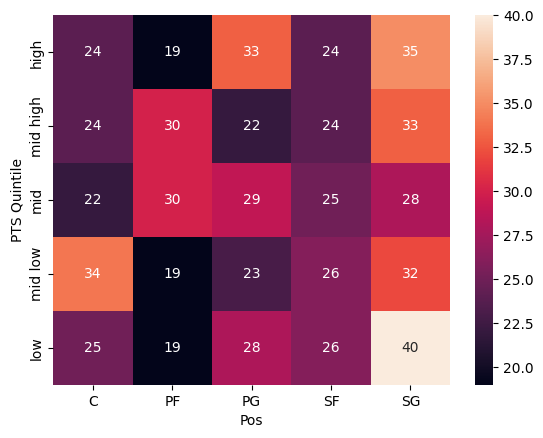

In [ ]:
levels = ['low', 'mid low', 'mid', 'mid high', 'high']
nba["PTS Quintile"] = points_quintile = pd.qcut(nba["PTS"], q=5, labels=levels)

players_position_points = pd.pivot_table(nba, index="PTS Quintile", columns="Pos",values="Player",aggfunc="count")
players_position_points = players_position_points.drop(["PF-SF","SF-SG","SG-PG"], axis=1)
sns.heatmap(players_position_points.sort_index(ascending=False),annot=True)

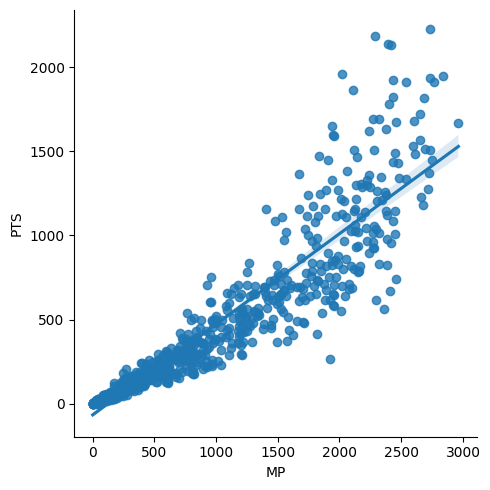

In [ ]:
sns.lmplot(data=nba, x="MP", y="PTS")